Cheat Sheet Pandas Zoltan Schaaf

In [ ]:
# 
# benötigte Bibliotheken importieren
import pandas as pd 
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# seaborn - plots customizen

df_tips_1 = sns.load_dataset('tips')
df_tips_1

In [ ]:
# daten aufbereiten - day gruppieren und der durchschnittswert von total_bill soll verwendet werden in dem plot
#df_tips_1.loc[:,['day','total_bill'].groupby(df_tips_1['day']).sum(df_tips_1['total_bill'])
erg = df_tips_1.groupby('day', as_index=False , observed=False).agg({'total_bill':'sum'})
erg['day']
erg

In [ ]:
# erstelle einen barplot mit : x-achse --> day und y-achse --> totalbill

fig = px.bar(x=erg['day'], y=erg['total_bill'], title='Barplot',   )
fig.show()


In [ ]:
# farben selbst bestimmen - du möchtest, dass die spalte day in folgender farbe dargestellt wird : Fr--> grün, Sun--> blau, Thur--> rot und Sat--> gelb
colors={'Thur':'red','Fri':'green','Sat':'yellow','Sun':'blue'}
fig = px.bar(x=Erg['day'], y=Erg['total_bill'], title='Barplot', color=Erg['day'],color_discrete_sequence = ["red","green","yellow","blue"])
# fig = px.bar(x=Erg['day'], y=Erg['total_bill'], title='Barplot', color=Erg['day'],
#              color_discrete_map = {'Thur':'red','Fri':'green','Sat':'yellow','Sun':'blue'},)
fig.update_layout(showlegend=True)
fig.show()
#fig.layout

In [ ]:
# farben selbst bestimmen - du möchtest, dass die spalte day in folgender farbe dargestellt wird : Fr--> grün, Sun--> blau, Thur--> rot und Sat--> gelb
# Seaborn
fig, (ax1) = plt.subplots(figsize=(10, 7))
sns.barplot(x=df_tips_1.day, y=df_tips_1.total_bill, palette=['red','green','yellow','blue'], hue = df_tips_1.day).set_title('Tips Datensatz')

In [ ]:
# datentyp bei geschlecht ändern in object
print(df_tips_1.dtypes)
df_tips_1['sex'] = df_tips_1['sex'].astype('object')
print(df_tips_1.dtypes)

In [ ]:
# das wort 'Female' in der Spalte Geschlecht soll umgeschrieben werden in 'weiblich'
df_tips_1.loc[df_tips_1['sex']=='Female','sex']='weiblich'
df_tips_1

In [ ]:
# size soll eine kategorische spalte erhalten, wobei 1 --> single, 2 --> duo, 3-6 gruppe sein soll
categories = ["single", "duo", "gruppe"]   # Namen der 3 Bereiche
einteilung = [0, 1, 2, 6]                  # 3 Wertebereiche 0-1, 1-2, 2-6
df_tips_1["G_Kategorie"] = pd.cut(df_tips_1["size"], bins=einteilung, labels=categories)
df_tips_1



In [ ]:
# es soll nach time (farblich) und nach tischgrößen/size_kategorisch (symbol) unterschieden werden
# dabei sollen folgende Sympole vergeben werden: single --> 'D', duo--> '.' , gruppe --> '^'
# f, (ax1) = plt.subplots(figsize=(10, 7))
# sns.scatterplot(x=df_tips_1.total_bill, y=df_tips_1.tip, hue= df_tips_1.time, size=df_tips_1.G_Kategorie ).set_title('Tips Datensatz')
fig,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(data=df_tips_1, x='total_bill',y='tip', hue='time', 
style='G_Kategorie', markers={'single':'D','duo':'o','gruppe':'^'},style_order=['gruppe','duo','single'])


In [ ]:
# du möchtest einen barplot und einen scatterplot nebeneinander darstellen - wie machst du das?
# Figurenobjekt erstellen
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2)

#Plots erstellen

plot1 = px.bar(df_tips_1,x='day',y='total_bill')
plot2 = px.scatter(df_tips_1,x='total_bill',y='tip')

# Daten der jeweiligen plots an das Figurenobjekt hängen und Subplot zuordnen

fig.add_trace(plot1.data[0],row=1, col=1)
fig.add_trace(plot2.data[0],row=1, col=2)

# Figurenobjekt anzeigen lassen

fig.show()

In [ ]:
fig,axs=plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(data=df_tips_1, x='total_bill',y='tip', hue='time', 
style='G_Kategorie', markers={'single':'D','duo':'.','gruppe':'^'},style_order=['gruppe','duo','single'],
ax=axs[0]).set_title('Bild links')

sns.barplot(data=df_tips_1, x='day', y='total_bill', 
palette={'Fri':'green','Sun':'blue','Sat':'yellow','Thur':'red'},
ax=axs[1], hue = 'day').set_title('Bild rechts')

In [ ]:
df_tips_1.iplot()

# Import

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

<h2><font color='darkblue'>Daten in Pandas einlesen</font></h2>

Bevor du die zur Analyse bestimmten Daten mit Pandas bearbeiten kannst, musst du diese zuvor einlesen. 
Dabei können die Daten in unterschiedlichen Datenformaten vorliegen. 

Die relevantesten Funktionen zum Einlesen und Speichern sind in der nachfolgenden Tabelle aufgelistet:


| Datenformat   | Einlesen           | Speichern            |
| ------------- |:--------------:| ----------------:|
| csv           | `pd.read_csv()`  |`df.to_csv()`     |
| json          | `pd.read_json()` |`df.to_json()`    |
| excel         | `pd.read_excel()`|`df.to_excel()`   |
| sql           | `pd.read_sql()`  |`df.to_sql()`     |


### Excel Daten

- r          - vor dem String der Datei um Windows Pfade direkt verwenden zu können.
- sheet_name - Name des Tabellenblattes
- skiprows   - Wenn Zeilen ignoriert werden sollen (Zeilen werden rausgenommen, Zeilennummern werden angepasst!!) 
- header     - Zeilennummer() der Kopfzeile(n)(bei mehreren Header Zeilen --> MultiIndex)


In [ ]:
df_ebike = pd.read_excel(r'C:\Users\User\Desktop\2020_Dataset_Ebikes.xlsx',
                         sheet_name='E-Bikes', skiprows=19, header=1, skipfooter=1, usecols='A:J,L:N' )
sheet_name='Sales', header=12, skipfooter=1, usecols='A:J,L:N'

### CSV Daten

- r         - vor dem String der Datei um Windows Pfade direkt verwenden zu können.
- sep=      - Trennzeichen
- index_col - 0 für keinen Index verwenden


In [ ]:
df_e = pd.read_csv(r'fehlende_Werte_uebung.csv', sep='|', index_col=0 )
df_e

### JSON Daten




In [ ]:
import json


In [ ]:
# JSON mit read_json() in einen DataFrame einlesen

df_ebike = pd.read_json(r'ebike.json')
df_ebike 

Link zu Lösungen:

C:\Users\User\Data Analytic\6. Lösungsvorschläge\3. JSON - Übung - Lösungsvorschlag.ipynb


### SQL Datenbank

In [ ]:
# benötigte Bibliotheken einlesen
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns # um den tips datensatz zu laden

In [ ]:
# mit db verbinden und cursor erstellen (sqlite3)
conn = sqlite3.connect('real_data.db') 
my_c=conn.cursor()

In [ ]:
# mit db verbinden und în DataFrame laden (seaborn)
df_tips = sns.load_dataset('tips')


In [ ]:
# SQL Abfrage über mehrere Tabellen
QE = '''SELECT *
        FROM station LIMIT 5
        '''
my_c.execute(QE)
result = my_c.fetchall()
pp.pprint(result)

In [ ]:
# Zählen der Datenbankelemente
QE = '''SELECT COUNT(*)
        FROM station 
        '''
my_c.execute(QE)
result = my_c.fetchall()
pp.pprint(result)

In [ ]:
# Zählen der Datenbankelemente
QE = '''SELECT CONT(*)
        FROM station 
        '''
my_c.execute(QE)
result = my_c.fetchall()
pp.pprint(result)

In [ ]:
# DISTINCT Funktion zur Bestimmung doppelter Werte
QE1 = '''SELECT DISTINCT search 
        FROM table
'''
QE2 = '''SELECT COUNT(DISTINCT search)
        FROM table 
        '''
my_c.execute(QE1)
result1 = my_c.fetchall()
pp.pprint(result1)
my_c.execute(QE2)
result2 = my_c.fetchall()
pp.pprint(result2)

## DataFrame analysieren

In [ ]:
# Spaltennamen herausfinden
df.columns 

In [ ]:
# um zu erfahren aus wie vielen Zeilen und Spalten der Datensatz besteht, verwendest du shape
# (Zeilen, Spalten)
df_ebike.shape

In [ ]:
# Wenn du erfahren möchtest, welche Datentypen und ob Non Werte vorliegen, kannst du dies mit info erreichen

df_ebike.info()


In [ ]:
# check, auf nullwerte

df_tips.isnull().sum() 

# keine nullwerte --> können visualisiert werden

In [ ]:
# Daten bei Auswahl sortieren
.sort_values()

In [ ]:
# Kreuztabelle der Werte 2er Spalten, auch fehlerhafte Werte werden aufgelistet.
pd.crosstab(df_ecar['Seats'], df_ecar['BodyStyle'], dropna=False)

In [ ]:
# Prüfen in welchen Bereichen von 'Bodystyle' '?' in 'Seats' auftreten und ersetzen durch den Wert von 'Seats',
# der in den meisten Zeilen des Bereiches auftritt
missing_types = df_ecar["BodyStyle"].loc[(df_ecar["Seats"] == '?')].unique() # Bei welchen 'Bodystyles' treten in 'Seats' '?' auf

for style in missing_types:
    max_seats = df_ecar.loc[(df_ecar['BodyStyle'] == style), 'Seats'].value_counts().idxmax() # finde den am häufigsten auftrtenden Wert
    df_ecar.loc[(df_ecar["Seats"] == '?') & (df_ecar['BodyStyle'] == style),["Seats"]] = max_seats # Ersetze die ? durch den Wert max_seat
df_ecar

# Speicher optimieren

In [ ]:
# welche Datentypen haben die Spalten?
df.dtypes                       # ganzer DataFrame
df.loc[:,'2018':'2020'].dtypes  # Mehrere Spalten

In [ ]:
# Befehl für jedes Element einer Liste ausführen 
# to_numeric() berechnet automatisch den optimalen Speicherplatz für die Datenart 
# ***  .apply  ***
# Beispiel
df_opti[["sepal_length","sepal_width","petal_length","petal_width"]] = df_opti[["sepal_length","sepal_width","petal_length","petal_width"]].apply(pd.to_numeric, downcast="float")
df_opti.dtypes 

In [ ]:
# Verwendeten Speicherplatz anzeigen 
df.memory_usage(deep=True)
# Summe des verwendeten Speicherplatzes zum Vergleich der Speicheroptimierung
df.memory_usage(deep=True).sum()

In [ ]:
# Datentyp einer Spalte ändern
df_t_w['zip_code'] = df_t_w['zip_code'].astype('category')#

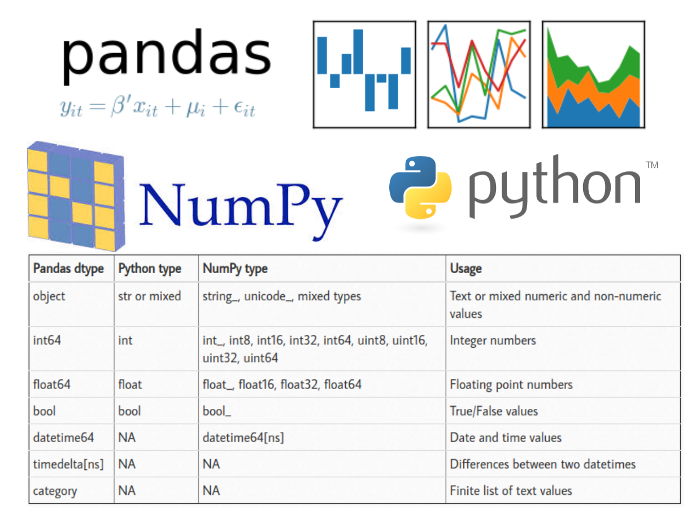

#### Spalten in einem DataFrame löschen
Löscht die Spalten anhand der Index-Werte über .iloc Funktion

In [ ]:
# Remove all columns between column index 37 to End of DataFrame
df_Germany.drop(df_Germany.iloc[:, 37:len(df_Germany.columns)], axis = 1, inplace=True)
df_Germany

In [ ]:
# lösche die spalten: 2017, geschlecht, rahmen und design

df_store = df_store.drop(columns=[2017,'Geschlecht','Rahmen','Design'])
df_store 

In [ ]:
# Spalte auf gleiche Werte prüfen
df_e['cylinders'].unique()   # Version 1
pd.unique(df_e['cylinders']) # Version 2

In [ ]:
# Prüfen ob Spalte nur numerische Werte enthält
# Am Ende der Fehlermeldung steht ein fehlerhaftes Zeichen
pd.to_numeric(df_e.loc[:,'mpg'])

In [ ]:
# Zeige die "Null" - Werte inklusive der entsprechenden Zeilen 
df_e.loc[df_e["horsepower"].isnull(), :]

In [ ]:
# Summe der fehlenden Werte in einem DataFrame
df_ebike.isnull().sum()

In [ ]:
# Zeilen ausgeben je nach Bedingungen der Spalten
df1.loc[(df1['A']==4)&(df1['B']==8)&(df1['C']==4),'A':'C']


In [ ]:
# Wert selektieren und neuen Wert zuweisen
# Wenn Wert in 'origin' gleich usa änder diesen in america
df_mpg.loc[df_mpg['origin']=='usa','origin']='america'


Series: df.loc[:,'A']
eindimensional 
Zugriff über Labels
df.loc['viper']
max_speed    4
shield       5
Name: viper, dtype: int64

DataFrame: df.loc[:,['A']]
mehrdimensional
df.loc[['viper', 'sidewinder']]
            max_speed  shield
viper               4       5
sidewinder          7       8

####  neue Spalten hinzufügen¶


In [ ]:
# füge eine spalte ein, die den umsatz_je_bike_modell von 2020 zeigt

df_store.insert(10,'revenue_2020', (df_store.loc[:,'Preis_in_€'] * df_store.loc[:,2020]))

#### Mehrere Spalten umbenennen

In [ ]:
#df_ebike=df_ebike.rename(columns={'Typ.1':'Motorgröße','Reichweite':'Reichweite_in_km'}) #Läuft!
df_ebike.rename(columns={'Typ.1':'Motorgröße','Reichweite':'Reichweite_in_km'},inplace=True)

#### Summe im Dataframe


In [ ]:
# berechne die Summe der Verkaufszahlen je Modell und speichere das Ergebnis in der neuen spalte sum_sales

df_store.insert(10,'sum_sales',df_store.loc[:,[2018,2019,2020]].sum(axis=1))

# alternativ:

df_store.insert(10,'sum_sales_iloc',df_store.iloc[:,-5:-2].sum(axis=1))

In [ ]:
# neue Spalte alternativ durch Wertzuweisung
# bei dieser Methode wird die Spalte automatisch an letzter Stelle eingefügt

df_store['neue_spalte'] = df_store.loc[:,[2018,2019,2020]].sum(axis=1)

In [ ]:
# replace auf eine Spalte anwenden
df_eBikes_s.loc[:,2018].replace('…',0,inplace=True)

In [ ]:
# Kategorien für einen DataFrame generieren und als Spalte hinzufügen 
categories = ["Single", "Duo", "Gruppe"]
einteilung = [0, 1, 2, 6]

df_tips["Gruppenkategorie"] = pd.cut(df_tips["size"], bins=einteilung, labels=categories)
df_tips


In [ ]:
# Spalten in Categories umwandeln


In [ ]:
# Wieviele Männer und Frauen besuchen unser Restaurant (Hint: groupby(), agg())
#df_g = df_tips.groupby(['sex'], as_index=False).agg({'smoker':'count'}) # Als DataFrame
df_g = df_tips.groupby(['sex']).size() # Als Series
# Bar Plot erzeugen
fig, ax = plt.subplots()
ax.bar(x=df_g.index, height=df_g.values, width=0.4, color=['blue','red']) # Aus Serie
#ax.bar(x=df_g['sex'], height=df_g['smoker'], width=0.4, color=['blue','red']) # Aus DataFrame


### Speicherung des DataFrames für die Visualisierung

In [ ]:
# alternativ: to_pickle Vorteil: Abspeicherung als DataFrame inkl. seiner Eigenschaften zum Speicherplatz
#                       Nachteil: wenn Versionen im Team nicht stimmen, kann der andere den DF nicht als pickle einlesen


df_ecar.to_pickle('ecar_after_preprocessing.pkl')

# Plotly Express
## Beispiel für Ersetzen von Labels

https://stackoverflow.com/questions/62853539/plotly-how-to-plot-on-secondary-y-axis-with-plotly-express

In [ ]:
# Beispiel für Ersetzen von Labels
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x="day", y="total_bill", color="sex",
            title="Receipts by Payer Gender and Day of Week",
            width=600, height=400,
            labels={ # replaces default labels by column name
                "sex": "Payer Gender",  "day": "Day of Week", "total_bill": "Receipts"
            },
            category_orders={ # replaces default order by column name
                "day": ["Thur", "Fri", "Sat", "Sun"], "sex": ["Male", "Female"]
            },
            color_discrete_map={ # replaces default color mapping by value
                "Male": "RebeccaPurple", "Female": "MediumPurple"
            },
            template="simple_white"
            )
fig.show()

# Matplotlib

https://matplotlib.org/stable/gallery/color/colormap_reference.html?highlight=figsize

In [ ]:
# Color map aufrufen
#
cmap=plt.get_cmap(name)

In [ ]:
type(np.nan)

# Seaborn

In [ ]:
import seaborn as sns

In [ ]:
# um die datensätze zu erhalten die in seaborn enthalten sind
sns.get_dataset_names()
# mit diesen datensätzen kann man üben

In [ ]:
# beispieldatensatz penguins laden

df_penguins = sns.load_dataset('penguins')
df_penguins 

## Scatterplot

<div style="background-color:rgba(241, 158, 158, .5); margin:20px; padding:30px;">
<h5><font color='black'>Merkbox:</font></h5> 

Es existieren 3 Paramter mit denen du zusätzliche Informationen in deinem Plot einbringen kannst. Die Parameter gruppieren die Daten. Jeder Parameter für sich spiegelt die Gruppierung unterschiedlich wider.
    
        hue   --> anhand der Farbe
        size  --> anhand der Größe
        style --> anhand des Symbols/Markers
 
</div>
Wir machen einmal eine Zusammenfassung bzw. Gegenüberstellung.

                                                hue               size             style
       ----------------------------------|-----------------|-----------------|-----------------
       Gruppierung                       |    Farbe        |    Größe        |   Symbol/Marker
       Customizing - Gruppierung         |    palette      |    sizes        |   markers
       Customizing - Anordnung           |    hue_order    |    size_order   |   style_order
       Customizing - Daten normalisieren |    hue_norm     |    size_norm    |       n/a
       

# Big Data und die fünf V-Herausforderungen
Im Zusammenhang mit Big-Data-Definitionen werden drei bis vier Herausforderungen beschrieben, die jeweils mit V beginnen. In der ursprünglichen Definition wurden nur drei Begriffe genannt: Volumen, Variety und Velocity. Volumen steht dabei für die Größe der Datenmenge bei unstrukturierten Daten: Die notwendige Datenanalyse kann nicht mehr mit herkömmlichen Mitteln bewältigt werden. Variety steht für die Vielfalt der Datenformate und Datenquellen, die durch komplexe Verarbeitungsprozesse im Unternehmen nicht mehr unter einen Hut gebracht werden können. Velocity steht für die zeitgerechte Verarbeitung der Datenmengen, damit schnell Resultate für Entscheidungsprozesse vorliegen. Recht früh konnte man aber in der Big-Data-Diskussion feststellen, dass nur dann gute Resultate mit Big Data erzielt werden können, wenn die zugrundeliegende Datenqualität ausreichend gesichert ist. Der vierte V-Begriff (Veracity) ist damit integraler Bestand von Big-Data-Definitionen geworden. Was steckt aus Unternehmersicht hinter den vier V-Begriffen und wie müssen Big-Data-Konzepte mit diesen Herausforderungen im Unternehmensinteresse klar kommen?

## Volumen:
**Die Datenmenge kann nicht mehr mit herkömmlichen Mitteln bewältigt werden**

Bisher war es so, dass große Datenmengen in isolierten Datensilos für sich getrennt betrachtet wurden. Jeder Bereich hatte seine eigenständigen Aufgaben und Datenbanken hatten den Zweck, diesen Bereich umfassend für die bereichsspezifischen Zwecke abzubilden. So wurden Marketinginformationen für das Marketing aufbereitet, Zahlungsinformationen wurden für das Rechnungswesen genutzt. Doch inzwischen hat man erkannt, dass diese Trennung der Bereiche nicht angemessen ist, um zukunftsfähig zu bleiben. Relevante Informationen müssen aus verschiedenen Bereichen zusammengeführt werden, damit der Erfolg für das Unternehmen umfassend umgesetzt werden kann.

## Variety:
**Die Vielfalt von Datenquellen und Datenformaten erfordern eine andere Datenanalyse**

Allerdings liegen in den unterschiedlichen Bereichen die Daten sehr unterschiedlich vor. Benutzerinteraktionen auf Webseiten können nicht sehr einfach den Kunden oder Interessenten zugeordnet werden. Bei Kommunikation mit Kunden werden Textinformationen benutzt, die nicht zu vorgegebenen Datenfelder passen. Es besteht die Gefahr, dass isolierte Datenbestände nicht so genutzt werden können, wie es für zukunftsorientiertes Handeln notwendig ist. Die Vielfalt der Datenformate kann aber nicht einfach reduziert werden, weil dadurch die Arbeit in den einzelnen Bereichen unzulässig eingeschränkt würde.
(z.B. unstrukturierte Daten, Bilder, Texte, Videos)

## Velocity:
**Die zeitgerechte Verarbeitung der Daten muss gesichert werden**

Ein weiteres großes Problem ist der Zeitaufwand, wenn unterschiedliche Datenbestände zusammengeführt werden müssen.(Geschwindigkeit) Glücklicherweise sind die Kosten für Arbeitsspeicher inzwischen so niedrig, dass es machbar wird, auch sehr große Datenmengen gleichzeitig in den Zugriff zu nehmen. Man spricht in diesem Zusammenhang von In-Memory-Datenverarbeitung: Unterschiedliche Datenbanken werden gleichzeitig in den Speicher geladen und intelligente Computerprogramme greifen ein, um Zusammenhänge zu finden, an die bisher noch nicht gedacht werden konnte.

## Veracity:
**Die Datenqualität entscheidet über den Erfolg von Big Data**

Doch das Hauptproblem für Big-Data-Auswertungsprozesse ist, dass unstrukturierte Daten nicht unbedingt zutreffende Daten über die zugrundeliegenden Prozesse darstellen. Daten fallen in allen Geschäftsbereichen laufend an und werden je nach Anwendungsfall sehr unterschiedlich weiterverarbeitet. So werden Rückmeldungen von Interessenten gelegentlich dokumentiert, aber in nicht ausreichend differenzierten Datenbeständen, die später Schwierigkeiten bei der Auswertung machen. Unternehmen sollten daran arbeiten, die Vielzahl der Datenbestände hinsichtlich ihrer Relevanz zu bewerten. Handelt es sich um Meinungsäußerungen oder Kritik an Produkten oder Vorgehensweisen, dann sollte sichergestellt werden, dass diese Aussagen repräsentativ erfasst werden, denn sonst entsteht ein schiefes Bild. Viele Daten garantieren keine gute Auswertungsperspektive, wenn es eher zufällig ist, dass diese Daten so umgeformt werden, dass sie ausreichend genau und spezifisch die zugrundeliegenden Abläufe darstellen.
(z.B. Kunden-/Produktbewertungen --> Speicherung in einheitlicher Bewertungsskala anstelle von Fließtext)

## Value
**Die Auswirkung auf das Business**

Das fünfte V ist eigentlich nicht erklärungsbedürtftig: Es steht für den Wert, sprich die Verwertbarkeit der mit Big Data erschlossenen Daten. Die Szenarien dafür können je nach Branche ganz unterschiedlich sein. So lassen sich mit Big Data etwa Produktionsprozesse optimieren, neue Zielgruppen erschließen oder ganz neue Produkte entwickeln. Die Einsatzfelder von Big Data sind, ähnlich denen der Elektrizität, praktisch unbegrenzt.

Quelle: https://www.bde-gmbh.de/blog/big-data/die-herausforderung-der-4-vs/; https://www.micromata.de/
        

# Datenarten #

## Strukturierte Daten? ##
Strukturierte Daten sind Informationen, die formatiert und in ein genau definiertes Datenmodell umgewandelt wurden.
Die Rohdaten werden in vordefinierte Felder abgebildet, die später einfach extrahiert und durch SQL gelesen werden können. Relationale SQL-Datenbanken, bestehend aus Tabellen mit Zeilen und Spalten, sind das perfekte Beispiel für strukturierte Daten.
Das relationale Modell strukturierter Daten verwendet Speicher, da es die Datenredundanz minimiert. Dies bedeutet jedoch auch, dass strukturierte Daten stärker voneinander abhängig und weniger flexibel sind.

**Beispiele für strukturierte Daten**

Strukturierte Daten werden sowohl von Menschen als auch von Maschinen generiert. Es gibt zahlreiche Beispiele für strukturierte Daten, die von Maschinen generiert werden, z. B. POS-Daten wie Menge, Barcodes und Weblog-Statistiken. Ebenso hätte jeder, der an Daten arbeitet, einmal in seinem Leben Tabellenkalkulationen verwendet, was ein klassischer Fall von strukturierten Daten ist, die von Menschen generiert werden. Aufgrund der Organisation strukturierter Daten ist die Analyse einfacher als bei halbstrukturierten und unstrukturierten Daten.

## Halbstrukturierte Daten
Ihre Daten sind möglicherweise nicht immer strukturiert oder unstrukturiert - halbstrukturierte Daten sind eine weitere Kategorie zwischen diesen beiden, die teilweise strukturiert ist. Solche Daten werden als halbstrukturiert definiert. Halbstrukturierte Daten sind Datentypen mit einigen konsistenten und eindeutigen Merkmalen. Sie beschränken sich nicht auf eine starre Struktur, wie sie für relationale Datenbanken erforderlich ist. Organisationseigenschaften wie Metadaten oder Semantik-Tags werden mit halbstrukturierten Daten verwendet, um die Verwaltung zu vereinfachen. Sie enthalten jedoch immer noch einige Schwankungen und Inkonsistenzen.

**Beispiel für halbstrukturierte Daten**

Ein Beispiel für halbstrukturierte Daten sind begrenzte Dateien. Es enthält Elemente, die die Daten in separate Hierarchien aufteilen können. In ähnlicher Weise hat das Bild in digitalen Fotografien selbst keine vordefinierte Struktur. Wenn es jedoch von einem Smartphone stammt, verfügt es über strukturierte Attribute wie Geotag, Geräte-ID und DateTime-Stempel. Nach dem Speichern können Bildern auch Tags wie "Haustier" oder "Hund" zugewiesen werden, um eine Struktur bereitzustellen.

In einigen Fällen werden unstrukturierte Daten als halbstrukturiert klassifiziert, da sie ein oder mehrere Klassifizierungsattribute aufweisen.
Halbstrukturierte Daten sind nicht richtig in Zellen oder Spalten strukturiert. Es enthält jedoch Elemente, die das Trennen von Feldern und Datensätzen erleichtern. Dies können Kommas oder Doppelpunkte oder irgendetwas anderes sein. Ein Beispiel für eine halbstrukturierte Datenbank ist eine JSON-Abfrage.

[{Vorname: "Jane", Nachname: "Smith", Bestellnummer: "123456", Auftragssumme: "12.34"}]

Die Daten können einfach durch Ausführen einiger Befehle in strukturierte Daten formatiert werden. Wenn wir diese Analogie analysieren, können wir feststellen, dass strukturierte Daten weniger flexibel, organisierter und in einem definierten Format gespeichert sind. Unstrukturierte Daten sind komplizierter und liefern meist qualitative Informationen, die nicht auf ein vordefiniertes Datenmodell abgebildet werden können. Halbstrukturierte Daten enthalten dagegen Eigenschaften beider Typen.

## Unstrukturierte Daten ##
Daten, die in absoluter Rohform vorliegen, werden als bezeichnet unstrukturiert. Diese Daten sind aufgrund ihrer komplexen Anordnung und Formatierung schwierig zu verarbeiten. Die unstrukturierte Datenverwaltung kann Daten aus vielen Formen annehmen, einschließlich Social-Media-Posts, Chats, Satellitenbildern, IoT-Sensordaten, E-Mails und Präsentationen, um sie auf logische, vordefinierte Weise zu organisieren.

Unstrukturierte Daten können alles sein, was nicht in einem bestimmten Format vorliegt. Dies kann ein Absatz aus einem Buch mit relevanten Informationen sein. Ein Beispiel für unstrukturierte Daten könnten Protokolldateien sein, die nicht einfach zu trennen sind. Social Media Kommentare und Beiträge, die analysiert werden müssen.

**Beispiel für unstrukturierte Daten aus einer Protokolldatei**

"38,P-R-38636-6-45,P-R-39105-1-11,P-R-38036-1-5,P-R-35697-1-13,P-R-35087-1-27,P-R-34341-1-9,P-R-33341-1-15,P-R-33110-1-29,P-R-31345-1-693,P-R-29076-1-6,P-R-28767-1-8,P-R-28540-2-8,P-R-28312-1-10,P-R-28069-1-27,P-R-28032-1-9,P-R-26562-1-12,P-R-26527-5-20,P-R-26164-1-11,P-R-25785-1-30,P-R-25095-9-70,P-R-23504-1-15,P-R-19719-5-41203 
Wed Sep 23 2020 05:21:01 GMT+0500"

Unstrukturierte Daten sind qualitativ und nicht quantitativ, daher sind sie meist kategorischer und charakteristischer Natur. Beispielsweise können Daten aus sozialen Medien oder Websites verwendet werden, um zukünftige Kauftrends herauszufinden oder die Effektivität einer Marketingkampagne zu bestimmen. Ein weiteres Beispiel für eine unstrukturierte Datenanalyse ist das Erkennen von Mustern in Betrugs-E-Mails und im Chat. Dies kann für Unternehmen hilfreich sein, um die Einhaltung von Richtlinien zu überwachen. Aus diesem Grund werden unstrukturierte Daten extrahiert und zur Analyse in unstrukturierten Data Warehouses (auch als Data Lakes bezeichnet) gespeichert.

Quelle: https://www.astera.com/de/type/blog/structured-semi-structured-and-unstructured-data/


## Was steckt hinter dem CAP-Theorem? ##

Das CAP-Theorem besagt, dass es nicht möglich ist, mehr als zwei der folgenden drei Eigenschaften gleichzeitig in einem verteilten System zu erfüllen bzw. zu garantieren:

1.Consistency (Konsistenz): Alle Clients sehen zum gleichen Zeitpunkt die gleichen Daten.
2.Availability (Verfügbarkeit): Alle Clients können jederzeit Lese- und Schreibzugriffe durchführen, da diese stets vom System beantwortet werden.
3.Partition Tolerance (Ausfalltoleranz): Das System kann trotz des Ausfalls einzelner Knoten, bzw. wenn einzelne Knoten nicht mehr miteinander kommunizieren können, als Ganzes weiterarbeiten.

Beim Aufbau eines neuen, verteilten Systems orientiert man sich heute an dem Theorem und wählt daher konkret ein Grundmodell, das sich auf zwei der drei Eigenschaften fokussiert. Dementsprechend lassen sich Zusammenschlüsse unabhängiger Computer in einem einzelnen System nach dem CAP-Theorem generell in drei Kategorien aufteilen:

- AP-System (Verfügbarkeit und Ausfalltoleranz)
- CA-System (Konsistenz und Verfügbarkeit)
- CP-System (Konsistenz und Ausfalltoleranz)

Bei BIGData ist Ausfalltoleranz immer gesetzt. Daher kommen dort normalerweise nur AP und CA in Frage.

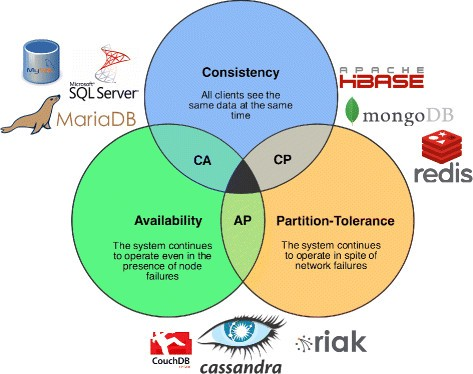

Quelle: https://medium.com/system-design-blog/cap-theorem-1455ce5fc0a0

**Das CAP-Theorem in der Praxis**

Um die Aussage des CAP-Theorems etwas deutlicher zu machen, stellen die nachfolgenden Beispiele verteilter Systeme die Gültigkeit des Grundsatzes unter Beweis. Zudem wird hervorgehoben, in welcher Hinsicht das Theorem Brewers zur Geltung kommt.

**AP-System-Beispiel:**  Das Domain Name System
Ein bekanntes Beispiel für ein AP-System ist das DNS, also das Domain Name System. Diese zentrale Netzwerkkomponente ist für die Auflösung von Domain-Namen zu IP-Adressen verantwortlich und stellt die beiden Eigenschaften Verfügbarkeit und Ausfalltoleranz in den Fokus. Dank der großen Zahl an Servern ist das System nämlich nahezu ausnahmslos verfügbar. Fällt ein einzelner DNS-Server aus, springt der nächste ein. Entsprechend des CAP-Theorems ist die Konsistenz beim DNS jedoch nicht gegeben: Wird ein DNS-Eintrag geändert, kann es sogar einige Tage lang dauern, bis diese Änderung an die gesamte Systemhierarchie weitergegeben wurde und von allen Clients gesehen werden kann.

**CA-System-Beispiel:**  Relationale Datenbank-Management-Systeme
Datenbank-Management-Systeme, die auf dem relationalen Datenbankmodell basieren, sind ein gutes Beispiel für CA-Systeme. Diese Datenbanksysteme zeichnen sich nämlich vor allem durch eine hohe Konsistenz aus und streben zudem nach einer möglichst hohen Verfügbarkeit. Im Zweifelsfall kann die Verfügbarkeit allerdings zugunsten der Konsistenz sinken. Ausfallsicherheit spielt derweil eine untergeordnete Rolle.

**CP-System-Beispiel:**  Finanz- bzw. Banking-Anwendungen
Eine hohe Verfügbarkeit zählt im Großteil verteilter Systeme zu den wichtigsten Eigenschaften, weshalb CP-Systeme in der Praxiseher eine Seltenheit sind. Ihren Wert beweisen diese Systeme aber insbesondere im Finanzwesen: Banking-Anwendungen, die Geldbeträge zuverlässig auf der Kontenseite abbuchen und transferieren müssen, sind auf Konsistenz und Ausfallsicherheit angewiesen, um Fehlbuchungen ausschließen zu können – auch im Fall von Störungen im Datenverkehr.

Quelle: https://www.ionos.de/digitalguide/server/knowhow/was-ist-das-cap-theorem/

## Hadoop Distributed File System (HDFS)##

Bei HDFS handelt es sich um ein hochverfügbares Dateisystem, das der Speicherung großer Datenmengen in einem Computercluster dient und somit innerhalb des Frameworks für die Datenhaltung zuständig ist. Dazu werden Dateien in Datenblöcke zerlegt und ohne Ordnungsschema redundant auf verschiedene Knoten verteilt. Den Entwicklern zufolge ist HDFS in der Lage, eine Anzahl an Dateien im dreistelligen Millionenbereich zu verwalten. Sowohl die Länge der Dateiblöcke als auch der Grad der Redundanz lassen sich individuell konfigurieren.

Das Hadoop-Cluster funktioniert grundsätzlich nach dem Master-Slave-Prinzip. Die Architektur des Frameworks besteht somit aus einem Master-Knoten, dem eine Vielzahl von Knoten als Slaves untergeordnet sind. Dieses Prinzip spiegelt sich auch im Aufbau des HDFS wieder, das auf einemNameNode und diversen untergeordneten DataNodes basiert. Der NameNode verwaltet sämtliche Metadaten zum Dateisystem, zu Verzeichnisstrukturen und Dateien. Die eigentliche Datenablage erfolgt auf den untergeordneten DataNotes. Um Datenverlust zu minimieren, werden Dateien dabei in einzelne Blöcke zerlegt und mehrfach auf verschiedenen Knoten gespeichert. Die Standardkonfiguration sieht vor, dass jeder Datenblock in dreifacher Ausführung vorliegt.

Jeder DataNode sendet dem NameNode in regelmäßigen Abständen ein Lebenszeichen, den sogenannten Heartbeat. Bleibt dieses Signal aus, erklärt der NameNote den jeweiligen Slave für „tot“ und sorgt mithilfe der Datenkopien auf anderen Knoten dafür, dass trotz des Ausfalls genügend Kopien der betreffenden Datenblöcke im Cluster verfügbar sind. Dem NameNode kommt somit eine zentrale Rolle innerhalb des Frameworks zu. Damit dieser nicht zum „Single Point of Failure“ wird, ist es üblich, diesem Master-Knoten einen SecondaryNameNode zur Seite zu stellen, der sämtliche Veränderungen bezüglich der Metadaten aufzeichnet und somit eine Wiederherstellung der zentralen Kontrollinstanz ermöglicht.

Im Übergang von Hadoop 1 zu Hadoop 2 wurde HDFS um weitere Sicherungssysteme erweitert: NameNode HA (High Availability) ergänzt das System um eine automatische Ausfallsicherung, bei der im Fall eines NameNode-Ausfalls automatisch eine Ersatzkomponente gestartet wird. Eine Snapshot-Funktion ermöglicht zudem, das System in einen früheren Status zurückzuversetzen. Darüber hinaus lassen sich durch die Erweiterung Federation mehrere NameNodes innerhalb eines Clusters führen.

Quelle: https://www.ionos.de/digitalguide/server/knowhow/apache-hadoop-das-framework-fuer-big-data/

## MapReduce-Engine ## 

Ein weiterer Grundbestandteil des Core Hadoop ist der von Google entwickelte MapReduce-Algorithmus, der in der <span class="girk">Hadoop-Version 1</span> noch als eigenständige Engine in das Framework implementiert ist. Zentrale Aufgabe dieser Engine ist das Ressourcenmanagement sowie die Steuerung und das Monitoring von Rechenprozessen (Job-Scheduling/Monitoring). Die Datenverarbeitung beruht dabei im Wesentlichen auf den Phasen „Map“ und „Reduce“, die es ermöglichen, dass Daten direkt am Ablageort verarbeitet werden (Data Locality). Dies beschleunigt die Rechenzeit und verringert den Netzdurchsatz. Im Rahmen der Map-Phase werden komplexe Rechenprozesse (Jobs) in Einzelteile zerlegt und von einem sogenannten JobTracker auf dem Master-Knoten an eine Vielzahl von Slave-Systemen im Cluster verteilt. Dort sorgen sogenannte TaskTracker dafür, dass die Teilprozesse parallelisiert abgearbeitet werden. In der darauffolgenden Reduce-Phase werden die Zwischenergebnisse von der MapReduce-Engine eingesammelt und zu einem Gesamtergebnis zusammengeführt.

Während der Master-Knoten in der Regel die Komponenten NameNode und JobTracker beherbergt, arbeiten auf jedem untergeordneten Slave jeweils ein DataNode und ein TaskTracker. Die folgende Grafik zeigt den Grundaufbau einer Hadoop-Architektur gemäß Version 1, aufgeteilt in MapReduce-Layer und HDFS-Layer.

Grundaufbau einer Hadoop-Architektur gemäß Version 1
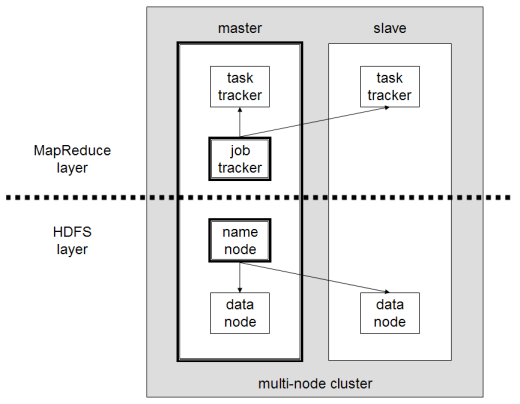

Quelle: https://en.wikipedia.org/wiki/Apache_Hadoop#/media/File:Hadoop_1.png

Mit dem Release der Hadoop-Version 2.3 wurde die MapReduce-Engine grundlegend überarbeitet. Das Ergebnis ist die Cluster-Verwaltungstechnik YARN/MapReduce 2.0, die das Ressourcenmanagement und die Aufgabenverwaltung (Job Scheduling/Monitoring) von MapReduce entkoppelt und das Framework so für neue Verarbeitungsmodelle und eine breite Palette von Big-Data-Anwendungen öffnet.

Quelle: https://www.ionos.de/digitalguide/server/knowhow/apache-hadoop-das-framework-fuer-big-data/

## YARN/MapReduce 2.0 ##

Mit der Einführung des Moduls YARN („Yet Another Resource Negotiator“) ab Version 2.3 wurde die Architektur von Hadoop grundlegend verändert. Man spricht daher auch von einem Übergang von Hadoop 1 zu Hadoop 2. Während Hadoop 1 Nutzern lediglich MapReduce als Anwendung bereitstellt, ermöglicht es die Entkopplung des Ressourcenmanagements und der Aufgabenverwaltung vom Datenverarbeitungsmodell, eine Vielzahl von Big-Data-Anwendungen in das Framework zu integrieren. Folglich ist MapReduce unter Hadoop 2 nur noch eine von vielen möglichen Anwendungen für den Datenzugriff, die sich im Framework ausführen lassen. Dieses ist somit nicht länger als reine MapReduce-Ablaufumgebung zu beschreiben. Stattdessen übernimmt YARN die Rolle eines verteilten Betriebssystems zur Ressourcenverwaltung für Big-Data-Applikationen.

Die grundlegenden Veränderungen der Hadoop-Architektur betreffen vor allem die beiden Tracker der MapReduce-Engine, die in Hadoop 2 nicht mehr als eigenständige Komponenten existieren. Stattdessen setzt das Modul YARN auf drei neue Entitäten: den ResourceManager, den NodeManager und den ApplicationMaster.

ResourceManager: Der globale ResourceManager fungiert als höchste Autorität in der Hadoop-Architektur (Master), dem diverse NodeManager als Slave untergeordnet sind. Diesem kommt die Aufgabe zu, das Computer-Cluster zu steuern, die Verteilung der Ressourcen auf die untergeordneten NodeManager zu orchestrieren und Anwendungen zu verteilen. Der ResourceManager weiß, wo sich die einzelnen Slave-Systeme im Cluster befinden und welche Ressourcen diese zur Verfügung stellen können. Eine wichtige Komponente des ResourceManagers ist der ResourceScheduler, der entscheidet, wie die verfügbaren Ressourcen im Cluster verteilt werden.
NodeManager: Auf jedem Knoten des Computer-Clusters läuft ein sogenannter NodeManager. Dieser nimmt die Position des Slaves in der Infrastruktur von Hadoop 2 ein und fungiert somit als Befehlsempfänger des ResourceManagers. Wird ein NodeManager auf einem Knoten im Cluster gestartet, meldet dieser sich beim ResourceManager an und sendet ein periodisches Lebenszeichen, den Heartbeat. Jeder NodeManager ist verantwortlich für die Ressourcen des eigenen Knotens und stellt dem Cluster einen Teil davon zur Verfügung. Wie diese Ressourcen im Cluster verwendet werden, wird durch den ResourceScheduler des ResourceManagers gesteuert.
ApplicationMaster: Jeder Knoten innerhalb des YARN-Systems beinhaltet einen ApplicationMaster, der Ressourcen vom ResourceManager und vom NodeManager anfragt und in Form von Containern zugeteilt bekommt. Auf diesen Containern werden die Big-Data-Anwendungen vom ApplicationMaster ausgeführt und überwacht.
Hier eine schematische Darstellung der Hadoop-2-Architektur:

schematische Darstellung der Hadoop-2-Architektur

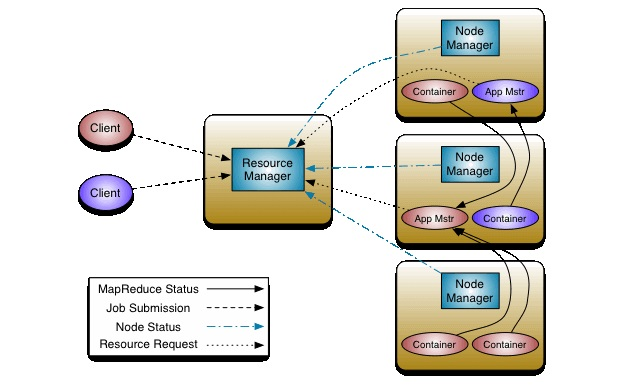




Quelle: http://hadoop.apache.org/docs/current/hadoop-yarn/hadoop-yarn-site/YARN.html

Soll eine Big-Data-Anwendung auf Hadoop 2 ausgeführt werden, sind grundsätzlich drei Akteure involviert:

- ein Client,
- der ResourceManager und
- ein oder mehrere NodeManager.
Im ersten Schritt erteilt der Client dem ResourceManager den Auftrag, dass eine Big-Data-Anwendung im Cluster gestartet werden soll. Dieser alloziert infolgedessen einen Container. Mit anderen Worten: Der ResourceManager reserviert Ressourcen des Clusters für die Anwendung und kontaktiert einen NodeManager. Der angesprochene NodeManager startet den Container und führt in diesem einen ApplicationMaster aus, der wiederum dafür zuständig ist, die Anwendung auszuführen und zu überwachen.


# SQL

## Erste Normalform Beispiel
Während der Anforderungsanalyse in der Datenbankentwicklung ist folgende Rechnungsinformation aufgenommen worden:

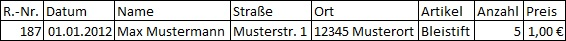

Nach der Anwendung der Ersten Normalform (1NF) sieht das Ergebnis folgendermaßen aus:


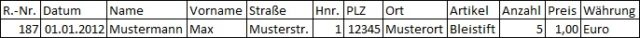

Die erste Normalform (1NF) ist dann erfüllt, wenn die Wertebereiche der Attribute des Relationstypen atomar vorliegen.

## Zweite Normalform Beispiel
Die Rechnungsinformationen liegen nun in der ersten Normalform (1NF) vor:

Nach der Anwendung der Zweiten Normalform (2NF) sieht das Ergebnis folgendermaßen aus:
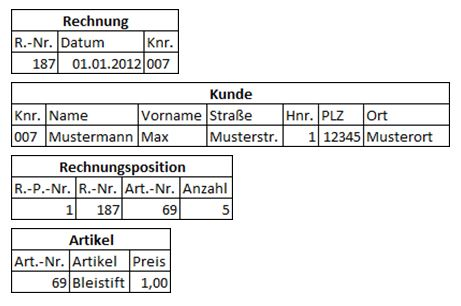

Da ein Name (Nachname) nicht eindeutig ist, wird jedem Kunden eine Kundennummer (Knr.) zugeordnet. Diese ist der Primärschlüssel der neuen Tabelle Kunde. Danach wird das gleiche mit den Artikeln durchgeführt. Des Weiteren wird eine Rechnungspositionstabelle eingebaut, da eine Rechnung von einem Kunden eine Vielzahl an Rechnungspositionen mit verschiedenen Artikeln beinhalten kann.

Die Spalten, die von einem Schlüsselkandidaten nicht vollständig funktional abhängig sind, werden in einer Untertabelle ausgelagert. Der Teil des Schlüsselkandidaten, von dem eine ausgelagerten Spalte funktional abhängig ist, wird Primärschlüssel der neuen Tabelle. In der zweiten Normalform werden auch die ersten Beziehungen in Datenbanken festgelegt.

Dritte Normalform Beispiel
Die Kundeninformationen liegen nun in der zweiten Normalform (2NF) vor:

![dritte_normalform_kundenbeispiel.jpg](attachment:dritte_normalform_kundenbeispiel.jpg)

Nach der Anwendung der Dritten Normalform (3NF) sieht das Ergebnis folgendermaßen aus:

Dritte Normalform Beispiel Die Kundeninformationen liegen nun in der zweiten Normalform (2NF) vor:

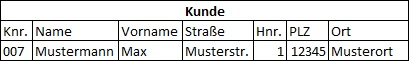



Nach der Anwendung der Dritten Normalform (3NF) sieht das Ergebnis folgendermaßen aus:

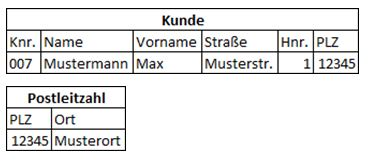

In der Tabelle „Kunde“ sind die Attribute „Vorname“, „Straße“ und „PLZ“ abhängig vom Attribut „Name“, nicht vom Primärschlüssel „Knr“. Außerdem ist das Attribut „Ort“ abhängig vom Attribut „PLZ“.

Die transitiv abhängigen Spalten werden in eine weitere Untertabelle ausgelagert, da sie nicht direkt vom Schlüsselkandidaten abhängen, sondern nur indirekt.